Цель: научится применять модели линейной регресси библиотеки scikit-learn к набору эмпирических данных

Дано: сsv-файл

Результат: эмпирическая формула

Ход выполнения: 
1. Загрузить данные из файла.
2. Визуализировать загруженные данные (диаграмма рассеяния, график).
3. Разбить данные на обучающую и тестовую выборки.
4. Выбрать модель регрессии.
5. Обучить модель регрессии на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.

1. Загрузить данные из файла.

In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt

f = '../../../tasks/lab1/dataset/lab1-01.csv'

data = pd.read_csv(f, header=None, names=['x', 'y'])
data

,x,y
0,1.040404,-205.789979
1,4.555556,-1933.310618
2,2.414141,-1075.586885
3,3.101010,-889.283808
4,1.929293,114.306301
...,...,...
195,2.292929,-1839.952732
196,5.727273,-1290.477030
197,5.848485,-1695.142646
198,1.404040,-354.121910


2. Визуализировать загруженные данные (диаграмма рассеяния, график).

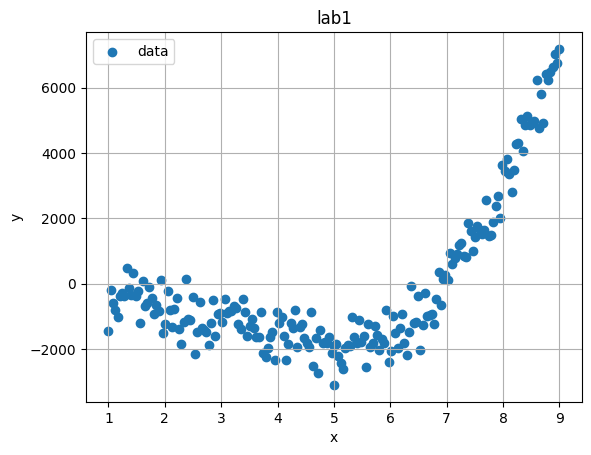

In [7]:
plt.scatter(data.x, data.y, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('lab1')
plt.grid(True)
plt.show()

3. Разбить данные на обучающую и тестовую выборки.

In [8]:
data = data.to_numpy()
X_tr, X_t, y_tr, y_t = sk.model_selection.train_test_split(data[:, 0], data[:, 1], test_size=0.3)
X_tr = X_tr.reshape(-1, 1)
y_tr = y_tr.reshape(-1, 1)
X_t = X_t.reshape(-1, 1)
y_t = y_t.reshape(-1, 1)

4. Выбрать модель регрессии.

In [9]:
model = linear_model.LinearRegression()

5. Обучить модель регрессии на обучающих данных.

In [10]:
model.fit(X_tr, y_tr)

LinearRegression()

6. Проверить качество полученной модели на тестовых данных.

In [11]:
print('R^2 test: ', model.score(X_t, y_t))
print('RMSE test: ', ((model.predict(X_t) - y_t)**2).sum()**0.5)

R^2 test:  0.4464255441200069
RMSE test:  15469.916315781793


7. Визуализировать результат.

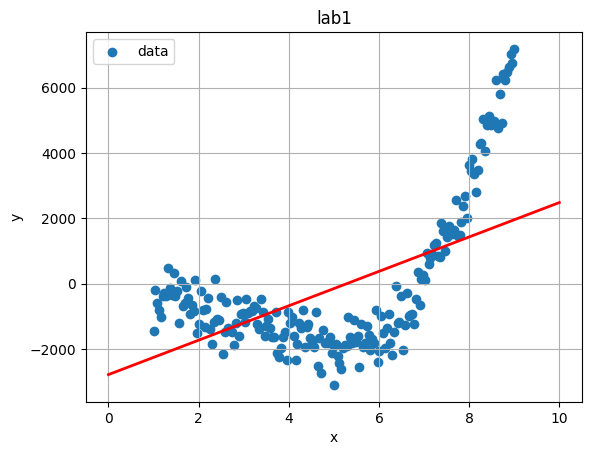

In [14]:
plt.scatter(data[:, 0], data[:, 1], label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('lab1')
plt.grid(True)

min_x = data[:, 0].min() - 1
max_x = data[:, 0].max() + 1
cur_y = model.predict(np.array([[min_x], [max_x]]))
plt.plot([min_x, max_x], cur_y, label='predicted', color='red', linewidth=2)
plt.show()